In [1]:
import pandas as pd

In [2]:
tags = pd.read_csv('ml-25m/tags.csv')
ratings = pd.read_csv('ml-25m/ratings.csv')
tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [3]:
movies = pd.read_csv('ml-25m/movies.csv')
print(movies.shape) #电影数量
movies.head(5)

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
links = pd.read_csv('ml-25m/links.csv')
print(links.shape)
print(links['imdbId'].value_counts().shape)
print(links['tmdbId'].value_counts().shape)
links.head(5)

(62423, 3)
(62423,)
(62281,)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
genome_tags = pd.read_csv('ml-25m/genome-tags.csv')
print(genome_tags.shape)
genome_tags.head(5)

(1128, 2)


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [6]:
links['movieId'].value_counts().shape #links中的电影数量

(62423,)

In [7]:
tags.shape #标签的数量

(1093360, 4)

In [8]:
tags['userId'].value_counts().shape #打标签的用户数

(14592,)

In [9]:
tags['movieId'].value_counts().shape #被打标签的电影数

(45251,)

In [10]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [11]:
ratings['time'] = pd.to_datetime(ratings['timestamp'], unit='s') #将timestamp中的时间戳转化为datetime
ratings.head(5)

,userId,movieId,rating,timestamp,time
0,1,296,5.0,1147880044,2006-05-17 15:34:04
1,1,306,3.5,1147868817,2006-05-17 12:26:57
2,1,307,5.0,1147868828,2006-05-17 12:27:08
3,1,665,5.0,1147878820,2006-05-17 15:13:40
4,1,899,3.5,1147868510,2006-05-17 12:21:50


In [12]:
ratings.loc[0, 'time'].strftime('%Y') 

'2006'

In [38]:
ratings['year'] = ratings['time'].map(lambda x : x.strftime('%Y')) #将打分时间中的年提取出来
ratings['ym'] = ratings['time'].map(lambda x : x.strftime('%Y-%m')) 
ratings.head(5)

,userId,movieId,rating,timestamp,time,year,ym
0,1,296,5.0,1147880044,2006-05-17 15:34:04,2006,2006-05
1,1,306,3.5,1147868817,2006-05-17 12:26:57,2006,2006-05
2,1,307,5.0,1147868828,2006-05-17 12:27:08,2006,2006-05
3,1,665,5.0,1147878820,2006-05-17 15:13:40,2006,2006-05
4,1,899,3.5,1147868510,2006-05-17 12:21:50,2006,2006-05


In [14]:
type(ratings.loc[0, 'year'])

str

In [15]:
ratings.to_csv('ml-25m/ratings_new.csv')

In [16]:
ratings['userId'].value_counts().shape #ratings 中打分的用户数

(162541,)

In [17]:
ratings['movieId'].value_counts().shape # ratings中被打分的电影数

(59047,)

In [18]:
ratings.shape

(25000095, 6)

In [19]:
ratings_2018 = ratings[ratings['year'] == '2018']
ratings_2018['userId'].value_counts().shape[0]

12001

In [26]:
ratings_2018.head(5)

,userId,movieId,rating,timestamp,time,year
6740,51,50,2.5,1530548826,2018-07-02 16:27:06,2018
9939,75,1,5.0,1537207651,2018-09-17 18:07:31,2018
9940,75,5,4.0,1537348819,2018-09-19 09:20:19,2018
9941,75,6,3.0,1537208125,2018-09-17 18:15:25,2018
9942,75,17,4.5,1537208282,2018-09-17 18:18:02,2018


In [28]:
ratings_2018[ratings_2018['rating']>5].shape

(0, 6)

In [31]:
tag_avenger = tags[tags['tag'] == 'The Avengers']
tag_avenger.head(5)

,userId,movieId,tag,timestamp
7953,2589,89745,The Avengers,1525376427
249266,13293,89745,The Avengers,1460839905
251616,13925,89745,The Avengers,1439776360
284435,17022,60040,The Avengers,1472054028
284605,17022,86332,The Avengers,1472053832


In [34]:
movie_avenger = tag_avenger['movieId'].value_counts()
print(movie_avenger.shape)
movie_avenger

(7,)


89745     27
86332     18
60040     16
122892    13
77561     10
88140      9
59315      6
Name: movieId, dtype: int64

In [39]:
rating_avenger = ratings[ratings['movieId'].isin(movie_avenger.index)]

In [40]:
rating_avenger.head(5)

,userId,movieId,rating,timestamp,time,year,ym
649,3,59315,4.0,1439472744,2015-08-13 13:32:24,2015,2015-08
655,3,60040,3.0,1453904151,2016-01-27 14:15:51,2016,2016-01
720,3,77561,4.0,1439473240,2015-08-13 13:40:40,2015,2015-08
749,3,86332,4.0,1439473515,2015-08-13 13:45:15,2015,2015-08
759,3,88140,3.5,1566089895,2019-08-18 00:58:15,2019,2019-08


In [43]:
rating_avenger_month = rating_avenger[["rating", "ym"]].groupby("ym").mean()
rating_avenger_month.head(5)

,rating
ym,
2008-05,4.027913
2008-06,3.904822
2008-07,3.875000
2008-08,3.853846
2008-09,3.782534


1.一共有多少用户

In [20]:
print('一共有 %d 用户' %(ratings['userId'].value_counts().shape[0]))

一共有 162541 用户


2.一共有多少电影

In [21]:
print('一共有 %d 部电影' %(movies.shape[0]))

一共有 62423 部电影


3.一共有多少不同的电影种类

In [22]:
print('一共有 %d 种不同的电影种类' %(genome_tags.shape[0]))

一共有 1128 种不同的电影种类


4.一共有多少电影没有外部链接

In [23]:
print('一共有 %d 部电影没有外部链接' %(movies.shape[0] - links['tmdbId'].value_counts().shape[0]))

一共有 142 部电影没有外部链接


5.2018年一共有多少人进行过电影评分

In [24]:
print('2018年一共有 %d 人进行过电影评分' %(ratings_2018['userId'].value_counts().shape[0]))

2018年一共有 12001 人进行过电影评分


6.2018年评分5分以上的电影及其对应的标签

In [29]:
print(ratings_2018[ratings_2018['rating']>5].shape[0])

0


没有评分5分以上的电影，因为评分最高分为5.

7.绘制电影复仇者联盟（The Avengers）每个月评分的平均值变化曲线图

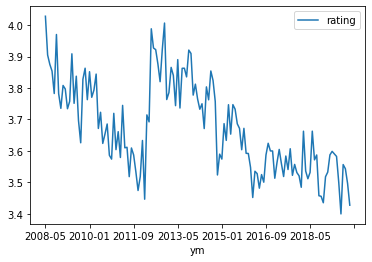

In [44]:
rating_avenger_month.plot()